#### In these notes, we compute the value of
$$
     I_d(p) = \min \left\{ \int | \nabla f |^2 - \frac1p\int f^{2p}, \quad \int f^2 = 1\right\},
$$
for different dimensions. The minimiser is the positive solution to the equation
$$
    - \Delta f - f^{2p-1} = \mu f, \quad \int f^2 = 1.
$$
In radial coordinates, we have
$$
    I_d(p) = | S^{d-1} | \int_0^\infty r^{d-1} | u' |^2 - \frac{| S^{d-1} |}{p} \int_0^\infty r^{d-1} u^{2p} 
    \quad \text{with} \quad 
    | S^{d-1} | \int_0^\infty r^{d-1} u^2 = 1.
$$
The Euler-Lagrange equations are
$$
    -u'' - (d-1) \frac{u'}{r} - u^{2p-1} = \mu u, \quad | S^{d-1} | \int_0^\infty r^{d-1} u^2 = 1.
$$

In [306]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%pylab inline
import scipy
import sys
sys.path.append('./src')
%load_ext autoreload
%autoreload 2
%aimport NLS_1d
%aimport cst
import cst

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'NLS_1d'

In [ ]:
Ng = 500 # number of grid points in [0, L]
eps = 0.1 #
p = 1.3 # the p value
d = 2
############################
rr = [eps/2 + n*eps for n in range(Ng)]

In [2]:
def integral(f, eps): return sum(f)*eps #integral on \R^+

In [3]:
def energy(u, p, d, eps):
    Ng = shape(u)[0]
    rr = array([eps/2 + n*eps for n in range(Ng)] )
    
    nablau = (u[1:] - u[:-1])/eps
    kinetic = cst.SS[d-1]*integral(rr[:-1]**(d-1) * nablau**2, eps)
    potential = - cst.SS[d-1]/p*integral( rr**(d-1) * u**(2*p), eps )
    return kinetic + potential

In [5]:
def get_H(u, p, d, eps): #here is full matrix. Sparsity is possible
    Ng = np.shape(u)[0]
    rr = array([eps/2 + n*eps for n in range(Ng)] )
    
    mDelta = (2*np.eye(Ng) - np.eye(Ng, Ng, 1) - np.eye(Ng, Ng, -1))/eps**2
    mDelta[0,0] = 1/eps**2 # what happens at 0.
    
    Nabla = ( np.eye(Ng, Ng, 1)  - np.eye(Ng, Ng, -1))/(eps) #centered
    Nabla[0, 0] = 0
    potential=-np.diag(u**(2*p-2))
    return mDelta - (d-1)*Nabla*diag(1/rr) + potential

In [7]:
def find_Id(u0, p, d, eps, tol=1e-7, Niter=1000, verbose = 1):
    assert abs( integral( rr**(d-1) * u0**2, eps) - 1/cst.SS[d-1]) < 1e-8, "Wrong number of particle in rho0"

    listu = []
    listenergy = []
    Ng = np.shape(u0)[0]
     
    u_n, energy_n = u0, float('inf')
    if verbose:
        print("Iteration\tEnergy\n----------\t-----------")
    # main loop
    for n in range(Niter):
        H = get_H(u_n, p, d, eps)
        W,V = np.linalg.eigh(H)

        u_n = abs ( V[:,0] )
        u_n = u_n / sqrt( cst.SS[d-1]*integral( rr**(d-1) * u_n**2, eps ) )
        energy_np1 = energy(u_n, p, d, eps)
        if verbose:
            print(n, "\t\t", energy_np1)
        
        listu.append(u_n)
        listenergy.append(energy_np1)
        
        if abs(energy_np1 - energy_n) < tol:
            return u_n, listu, listenergy
        energy_n = energy_np1
        
    print("did not converge")
    return u_n, listu, listenergy

# Computation for d = 2

In [11]:
# Test cell
# The case N = 1
Ng = 10000 # number of grid points in [0, L]
eps = 0.02#
p = 1.8 # the p value
d = 2
############################
rr = array([eps/2 + n*eps for n in range(Ng)])

u0 = exp(-rr**2/600)
u0 = u0 / sqrt(cst.SS[d-1]*integral(rr**(d-1) * u0**2, eps) )

#plot(rr, u0)
u1, listu, listenergy=find_Id(u0, p, d, eps, tol=1e-8, Niter=100, verbose = 1)
print("min u = ", u1[-1])

Iteration	Energy
----------	-----------


KeyboardInterrupt: 

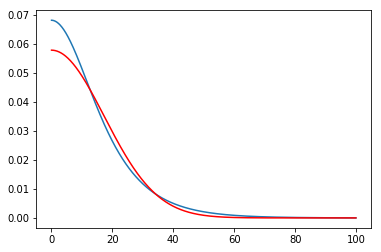

In [9]:
plot(rr, u1)
plot(rr, u0, 'r')

In [34]:
min(u0)

3.391828118577515e-09

The computation

In [276]:
%%time
# The parameters for the computation
# The case N = 1
Ng = 1000
eps = 0.02
d = 3
############################
rr = array([eps/2 + n*eps for n in range(Ng)])

u0 = exp(-rr/2)
u0 = u0 / sqrt(cst.SS[d-1]*integral(rr**(d-1) * u0**2, eps) )

############################
prange = linspace(1.01, 5/3-0.1, 10 )
I3 = []
list_u3 = []

for p in prange:
    print("\nComputation for p = ", p)
    u1, listu, listenergy=find_Id(u0, p, d, eps, tol=1e-7, Niter=200, verbose = 1)
    I3.append(listenergy[-1])
    list_u3.append(u1)
    u0 = u1


Computation for p =  1.01
Iteration	Energy
----------	-----------
0 		 -0.8739856301449334
1 		 -0.8812335411746761
2 		 -0.8814884204802833
3 		 -0.881360655863969
4 		 -0.881300271284571
5 		 -0.8812793737832182
6 		 -0.881272627058591
7 		 -0.8812704907999375
8 		 -0.881269818251592
9 		 -0.8812696068785949
10 		 -0.8812695404807145

Computation for p =  1.0718518518518518
Iteration	Energy
----------	-----------
0 		 -0.4843601541214869
1 		 -0.4901138772465841
2 		 -0.49187335512146163
3 		 -0.49230394246940246
4 		 -0.49237193257150513
5 		 -0.49236106633222954
6 		 -0.4923421992209686
7 		 -0.49232865769101697
8 		 -0.492320560704705
9 		 -0.49231604672492335
10 		 -0.49231360909760713
11 		 -0.49231231303925543
12 		 -0.49231162932693884
13 		 -0.49231127009743614
14 		 -0.49231108174813376
15 		 -0.4923109831010281

Computation for p =  1.1337037037037037
Iteration	Energy
----------	-----------
0 		 -0.2750787783819375
1 		 -0.2750493260775783
2 		 -0.27496164026875314
3 		 -0

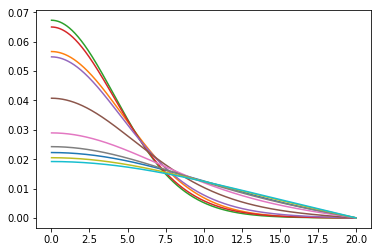

In [277]:
for u in list_u3:
    plot(rr, u)

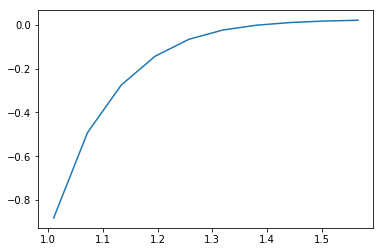

In [278]:
plot(prange, I3)

In [231]:
#save result
I3p={"prange": prange, "I3":I3} 
save("src/data/I3p_new.npy", I3p)

# The case d = 2

In [336]:
# Test cell
# The case N = 1
Ng = 2000 # number of grid points in [0, L]
eps = 0.2#
p = 1.9 # the p value
d = 2
############################
rr = array([eps/2 + n*eps for n in range(Ng)])

u0 = exp(-rr/2)
u0 = u0 / sqrt(cst.SS[d-1]*integral(rr**(d-1) * u0**2, eps) )

#plot(rr, u0)
u1, listu, listenergy=find_Id(u0, p, d, eps, tol=1e-7, Niter=100, verbose = 1)
print("min u = ", u1[-1])

Iteration	Energy
----------	-----------
0 		 0.06136500890072935


KeyboardInterrupt: 

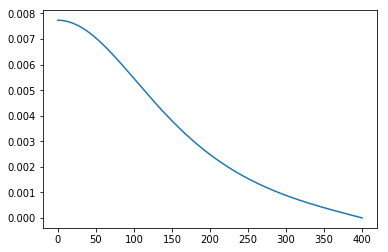

In [287]:
plot(rr, u1)

The computation

In [302]:
%%time
# The parameters for the computation
# The case N = 1
Ng = 1000
eps = 0.05
d = 2
############################
rr = array([eps/2 + n*eps for n in range(Ng)])

u0 = exp(-rr**2/100)
u0 = u0 / sqrt(cst.SS[d-1]*integral(rr**(d-1) * u0**2, eps) )

############################
prange = linspace(1.01, 1.99, 100 )
I2 = []
list_u2 = []

for p in prange:
    print("\nComputation for p = ", p)
    u1, listu, listenergy=find_Id(u0, p, d, eps, tol=1e-7, Niter=200, verbose = 1)
    I2.append(listenergy[-1])
    list_u2.append(u1)
    u0 = u1


Computation for p =  1.01
Iteration	Energy
----------	-----------
0 		 -0.9254653114911108
1 		 -0.9260419378354496
2 		 -0.9261746051392601
3 		 -0.9262064373751299
4 		 -0.9262142430768094
5 		 -0.926216179659134
6 		 -0.9262166637381682
7 		 -0.9262167856023796
8 		 -0.9262168165931813

Computation for p =  1.0198989898989899
Iteration	Energy
----------	-----------
0 		 -0.8687708175939657
1 		 -0.8693500988900015
2 		 -0.8695036061960165
3 		 -0.8695426288443799
4 		 -0.8695521959645528
5 		 -0.8695544251270748
6 		 -0.8695548919622612
7 		 -0.8695549621649453

Computation for p =  1.0297979797979797
Iteration	Energy
----------	-----------
0 		 -0.8195434315042814
1 		 -0.8198135548734475
2 		 -0.8198815314285827
3 		 -0.8198976601295269
4 		 -0.8199011084427031
5 		 -0.8199016571851163
6 		 -0.8199016343850035

Computation for p =  1.0396969696969698
Iteration	Energy
----------	-----------
0 		 -0.7748840527736017
1 		 -0.7750397911353104
2 		 -0.7750766248679193
3 		 -0.77508428

0 		 -0.2650446849794506
1 		 -0.26503407355492237
2 		 -0.2650274840249102
3 		 -0.2650237381925134
4 		 -0.2650216678634077
5 		 -0.2650205353096321
6 		 -0.2650199182716738
7 		 -0.2650195826679762
8 		 -0.2650194002711496
9 		 -0.26501930117457123

Computation for p =  1.2574747474747474
Iteration	Energy
----------	-----------
0 		 -0.2513020352603034
1 		 -0.2512935860569307
2 		 -0.2512881047483723
3 		 -0.2512849432805285
4 		 -0.25128318201833666
5 		 -0.25128221255110517
6 		 -0.251281681316866
7 		 -0.25128139073684214
8 		 -0.2512812319099214
9 		 -0.2512811451254234

Computation for p =  1.2673737373737373
Iteration	Energy
----------	-----------
0 		 -0.23813521208741892
1 		 -0.23812910250935754
2 		 -0.23812482432758103
3 		 -0.2381223021650078
4 		 -0.23812088261726289
5 		 -0.23812009572403403
6 		 -0.2381196618817788
7 		 -0.23811942317195373
8 		 -0.23811929193200196
9 		 -0.23811921980106457

Computation for p =  1.2772727272727273
Iteration	Energy
----------	-------

12 		 -0.07162203466979467
13 		 -0.07162220117198231
14 		 -0.0716223054297718
15 		 -0.07162237071407053

Computation for p =  1.4653535353535354
Iteration	Energy
----------	-----------
0 		 -0.06613355604615098
1 		 -0.0661908267010698
2 		 -0.06622358390330868
3 		 -0.06624356353181686
4 		 -0.06625599619622992
5 		 -0.06626378861890338
6 		 -0.06626868770581686
7 		 -0.0662717724644509
8 		 -0.06627371646112422
9 		 -0.06627494217180482
10 		 -0.06627571523324312
11 		 -0.0662762029000578
12 		 -0.06627651056962108
13 		 -0.06627670469337683
14 		 -0.06627682718136445
15 		 -0.06627690447102835

Computation for p =  1.4752525252525253
Iteration	Energy
----------	-----------
0 		 -0.06104730414174821
1 		 -0.06110779544600975
2 		 -0.06114274951723421
3 		 -0.06116424668619928
4 		 -0.0611777269232328
5 		 -0.06118623997287542
6 		 -0.06119163269893793
7 		 -0.061195054152167624
8 		 -0.06119722683916684
9 		 -0.06119860727041107
10 		 -0.061199484625877765
11 		 -0.061200042358960

0 		 -0.016173536005097057
1 		 -0.016262991094871518
2 		 -0.016321484032763997
3 		 -0.016361508729159202
4 		 -0.016389297729591752
5 		 -0.016408713700605967
6 		 -0.0164223272322062
7 		 -0.016431893897416103
8 		 -0.01643862703556046
9 		 -0.016443370989147006
10 		 -0.016446715953417797
11 		 -0.01644907574829877
12 		 -0.016450741156815538
13 		 -0.0164519168203383
14 		 -0.016452746913995495
15 		 -0.01645333309123808
16 		 -0.01645374706389234
17 		 -0.016454039440874986
18 		 -0.016454245948045933
19 		 -0.01645439180980457
20 		 -0.016454494838447346
21 		 -0.016454567613340784

Computation for p =  1.6138383838383838
Iteration	Energy
----------	-----------
0 		 -0.014128046648452311
1 		 -0.014218124690469618
2 		 -0.014277565886101441
3 		 -0.014318573133810651
4 		 -0.014347270822513747
5 		 -0.014367480928210954
6 		 -0.014381764579194982
7 		 -0.014391883112968289
8 		 -0.014399062565620652
9 		 -0.01440416239410016
10 		 -0.01440778789792619
11 		 -0.01441036676795609

0 		 -0.0019481706078069878
1 		 -0.0020245310146767906
2 		 -0.0020796119309750734
3 		 -0.0021207987609693224
4 		 -0.002151977687264873
5 		 -0.002175730424041386
6 		 -0.0021939022115130234
7 		 -0.002207847875170938
8 		 -0.0022185759752311185
9 		 -0.0022268442428259455
10 		 -0.002233225913598029
11 		 -0.0022381570010384898
12 		 -0.0022419705619515264
13 		 -0.002244921864190619
14 		 -0.0022472070727361133
15 		 -0.0022489772466560733
16 		 -0.0022503488994228167
17 		 -0.00225141201299155
18 		 -0.0022522361479957835
19 		 -0.0022528751197218623
20 		 -0.002253370587067472
21 		 -0.0022537548135627174
22 		 -0.0022540527953675317
23 		 -0.0022542839037018973
24 		 -0.00225446315388568
25 		 -0.002254602186824335
26 		 -0.0022547100285310734
27 		 -0.002254793678193562

Computation for p =  1.7227272727272727
Iteration	Energy
----------	-----------
0 		 -0.001407061777866217
1 		 -0.001479859784853363
2 		 -0.0015328226793785114
3 		 -0.001572736520857109
4 		 -0.001603183860

27 		 0.00012961671819119742
28 		 0.00012953334130099813

Computation for p =  1.801919191919192
Iteration	Energy
----------	-----------
0 		 0.00037697886095844173
1 		 0.0003485275104331354
2 		 0.0003275378068563345
3 		 0.00031160050111848914
4 		 0.0002993653357048929
5 		 0.00028990957184987873
6 		 0.0002825649425702006
7 		 0.0002768368256148464
8 		 0.00027235450026985315
9 		 0.00026883743108475043
10 		 0.0002660716077801705
11 		 0.0002638926388861193
12 		 0.00026217350440122227
13 		 0.00026081557443339946
14 		 0.0002597419482765484
15 		 0.00025889246350359503
16 		 0.0002582199216777919
17 		 0.00025768721095609237
18 		 0.00025726509698132793
19 		 0.00025693051669589424
20 		 0.00025666525394714076
21 		 0.0002564549071309846
22 		 0.0002562880817167665
23 		 0.00025615575687300534
24 		 0.00025605078749727124
25 		 0.00025596751199817927

Computation for p =  1.8118181818181818
Iteration	Energy
----------	-----------
0 		 0.0004664731930889834
1 		 0.00044519769810

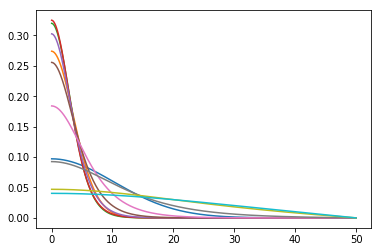

In [300]:
for u in list_u2:
    plot(rr, u)

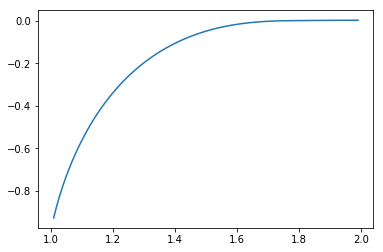

In [304]:
plot(prange, I2)

In [305]:
#save result
I2p={"prange": prange, "I2":I2} 
save("src/data/I2p_new.npy", I2p)

In [335]:
cst.SS[0]

1.0